In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('zomato.csv',encoding = "ISO-8859-1")
df_ncr=df[(df['Country Code']==1)&(df['City']=='New Delhi')|(df['City']=='Ghaziabad')|(df['City']=='Noida')|(df['City']=='Gurgaon')|((df['City']=='Faridabad'))]
df_roi=df[(df['Country Code']==1)&~((df['City']=='New Delhi')|(df['City']=='Ghaziabad')|(df['City']=='Noida')|(df['City']=='Gurgaon')|((df['City']=='Faridabad')))]

## 1.1 Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

1.1
The following data is of areas(Delhi-NCR and Rest of India) and the restaurants present there:
Delhi-NCR : 7947
Rest of India : 705


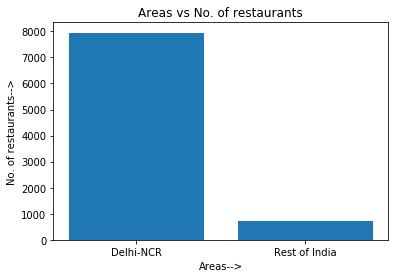

In [19]:
restaurants=[len(df_ncr),len(df_roi)]
areas=['Delhi-NCR','Rest of India']
print("1.1")
print('The following data is of areas(Delhi-NCR and Rest of India) and the restaurants present there:')
for i in range(2):
    print(areas[i],':',restaurants[i])
f=plt.figure()    
plt.bar(areas,restaurants)
plt.xlabel('Areas-->')
plt.ylabel('No. of restaurants-->')
plt.title('Areas vs No. of restaurants')
plt.show()

## 1.2 Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [20]:
cuisines_ncr=df_ncr['Cuisines'].values
cuisines_ncr_set=set()
for i in cuisines_ncr:
    for j in i.split(','):
        cuisines_ncr_set.add(j.strip())
cuisines_roi=df_roi['Cuisines'].values
cuisines_roi_set=set()
for i in cuisines_roi:
    for j in i.split(','):
        cuisines_roi_set.add(j.strip())
cuisines_not_in_ncr=cuisines_roi_set.difference(cuisines_ncr_set)   

In [21]:
# api-key : 76eb0f9beff9ee2b1fb5f39234e65e19
import requests
header={'user-key':'76eb0f9beff9ee2b1fb5f39234e65e19'}
param={'city_id':1}
response=requests.get('https://developers.zomato.com/api/v2.1/cuisines',headers=header,params=param)
cuisines=response.json()['cuisines']
cuisines_ncr_set_from_api=set()
for cuisine in cuisines:
    cuisines_ncr_set_from_api.add(cuisine['cuisine']['cuisine_name'].strip())
print('1.2')
print('Following are cuisines which are not present in restaurant of Delhi NCR but present in rest of India:')
for i in cuisines_not_in_ncr:
    print(i)    
print()    
print('Following are the cuisines which are served in Delhi-NCR as fetched from API but does not present in the dataset:')
cuisines_req=cuisines_ncr_set_from_api.intersection(cuisines_not_in_ncr)
for i in cuisines_req:
    print(i)
print('This shows that the dataset is incomplete.')   

1.2
Following are cuisines which are not present in restaurant of Delhi NCR but present in rest of India:
Malwani
German
Cajun
BBQ

Following are the cuisines which are served in Delhi-NCR as fetched from API but does not present in the dataset:
Malwani
BBQ
This shows that the dataset is incomplete.


## 1.3 Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India

In [22]:
def print_top_10_cuisines(df):
    cuisines_ncr=df['Cuisines'].values
    cuisines_ncr_lst=[]
    for i in cuisines_ncr:
        for j in i.split(','):
            cuisines_ncr_lst.append(j.strip())
    cuisines,counts=np.unique(cuisines_ncr_lst,return_counts=True)
    indices=np.argsort(counts)[::-1][:10]
    cuisines=cuisines[indices]
    counts=counts[indices]
    for i in range(10):
        print(cuisines[i],":",counts[i])

In [23]:
print('1.3')
print('The following data depicts the top 10 cuisines in Delhi-NCR and the number of restaurants in which they are served:')
print_top_10_cuisines(df_ncr)
print()
print('The following data depicts the top 10 cuisines in Rest of India and the number of restaurants in which they are served:')
print_top_10_cuisines(df_roi)

1.3
The following data depicts the top 10 cuisines in Delhi-NCR and the number of restaurants in which they are served:
North Indian : 3597
Chinese : 2448
Fast Food : 1866
Mughlai : 933
Bakery : 697
South Indian : 569
Continental : 547
Desserts : 542
Street Food : 538
Italian : 535

The following data depicts the top 10 cuisines in Rest of India and the number of restaurants in which they are served:
North Indian : 349
Chinese : 242
Continental : 177
Italian : 147
Cafe : 136
Fast Food : 97
South Indian : 62
Mughlai : 59
Desserts : 55
Mexican : 50


## 1.4 Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

In [24]:
def get_cuisines(df):
    cuisines=df['Cuisines'].values
    cuisines_lst=[]
    for i in cuisines:
        for j in i.split(','):
            cuisines_lst.append(j.strip())
    cuisines,counts=np.unique(cuisines_lst,return_counts=True)
    indices=np.argsort(counts)[::-1][:30]
    cuisines=cuisines[indices]
    counts=counts[indices]
    return cuisines,counts

1.4 (a)


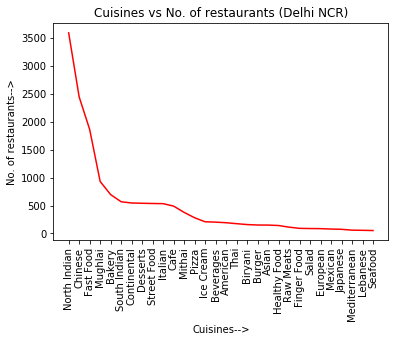

In the above graph I have plotted only top 30 cuisines and the restaurants serving them which are very popular in 
Delhi-NCR Region. As we can infer from the graph,'North Indian' cuisine is very popular in Delhi-NCR Region.
There are total 3597 restaurants which are serving 'North Indian' cuisine in Delhi-NCR Region.



In [25]:
cuisines_ncr,restaurants_ncr=get_cuisines(df_ncr)
f=plt.figure()
plt.plot(cuisines_ncr,restaurants_ncr,color='red')
plt.xticks(rotation=90)
plt.xlabel('Cuisines-->')
plt.ylabel('No. of restaurants-->')
plt.title('Cuisines vs No. of restaurants (Delhi NCR)')
print('1.4 (a)')
plt.show()
print("""In the above graph I have plotted only top 30 cuisines and the restaurants serving them which are very popular in 
Delhi-NCR Region. As we can infer from the graph,'North Indian' cuisine is very popular in Delhi-NCR Region.
There are total 3597 restaurants which are serving 'North Indian' cuisine in Delhi-NCR Region.
""")

1.4 (b)


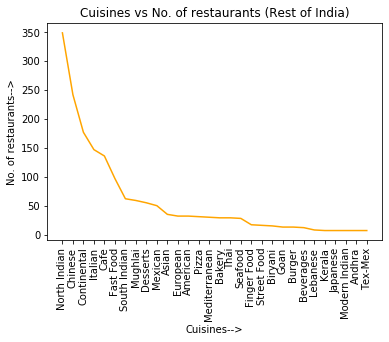

In the above graph I have plotted only top 30 cuisines and the restaurants serving them which are very 
popular in Rest of India. As we can infer from the graph,'North Indian' cuisine is very popular in Rest of India.
There are total 349 restaurants which are serving 'North Indian' cuisine in Rest of India.



In [26]:
cuisines_roi,restaurants_roi=get_cuisines(df_roi)
plt.plot(cuisines_roi,restaurants_roi,color='orange')
plt.xticks(rotation=90)
print('1.4 (b)')
plt.xlabel('Cuisines-->')
plt.ylabel('No. of restaurants-->')
plt.title('Cuisines vs No. of restaurants (Rest of India)')
plt.show()
print("""In the above graph I have plotted only top 30 cuisines and the restaurants serving them which are very 
popular in Rest of India. As we can infer from the graph,'North Indian' cuisine is very popular in Rest of India.
There are total 349 restaurants which are serving 'North Indian' cuisine in Rest of India.
""")